# Major Project
#### Name: Adithya Ganesan
#### Email: adithyaganesh2000@gmail.com
#### MAY Batch  2

##### Problem Statement: 
For the given dataset, perform EDA with visualization, formulate 2 questions on the given data and answer the same. Then proceed to to build an ensemble classifier using 3 ML algorithms and find out which algorithm best suits the dataset with respect to the accuracy of the algorithm.

### Solution
1. The dataset is to be analysed and preliminary data cleaning is to be done.
2. Data exploration and feature engineering are done for fine tuning of dataset.
3. ML modelling and accuracy checking to find the optimal algorithm for the dataset.

In [440]:
#Importing the required packages

import numpy as np
import pandas as pd
import seaborn as sb
from datetime import datetime
%matplotlib inline
import matplotlib.pyplot as plt

from collections import Counter
import re

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import linear_model, metrics
from sklearn import naive_bayes
from sklearn import svm
from sklearn.model_selection import train_test_split

### Preliminary Data Cleaning:
The data is analysed and the irrelevant data is cleaned.

In [441]:
#Reading dataset and creating dataframe

twitter = pd.read_csv('C:/Users/Adithya/Downloads/Information.csv', encoding = 'ISO-8859-1')
twitter.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [442]:
twitter.shape

(20050, 26)

In [443]:
#Removing all rows which don't have gender as 'male' or 'female' 

twitter = twitter.loc[twitter['gender'].isin(['female', 'male'])]
twitter.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [444]:
twitter.shape

(12894, 26)

In [445]:
twitter.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

From the above table, it is finalized that only the following columns are required for modelling the ML algorithm:
1. 'gender'
2. 'link_color'
3. 'sidebar_color'
4. 'text'
5. 'description'

In [446]:
#Dropping irrelevant columns from dataset

twitter = twitter.drop(['_unit_id', '_golden', '_unit_state', '_last_judgment_at', 'gender:confidence', 'profile_yn', 'profile_yn:confidence', 
                        'created', 'fav_number', 'gender_gold', 'name', 'profile_yn_gold', 'profileimage', 'retweet_count', 
                        'tweet_coord', 'tweet_count', 'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone', 
                        '_trusted_judgments'], axis = 1)

In [447]:
twitter.head()

,gender,description,link_color,sidebar_color,text
0,male,i sing my own rhythm.,08C2C2,FFFFFF,Robbie E Responds To Critics After Win Against...
1,male,I'm the author of novels filled with family dr...,0084B4,C0DEED,ÛÏIt felt like they were my friends and I was...
2,male,louis whining and squealing and all,ABB8C2,C0DEED,i absolutely adore when louis starts the songs...
3,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",0084B4,C0DEED,Hi @JordanSpieth - Looking at the url - do you...
4,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,3B94D9,0,Watching Neighbours on Sky+ catching up with t...


### Data Exploration & Feature Engineering
Here we are going to explore the relationships of the independent and dependent variables and modify the features to present a better dataset for the ML models.

### Data exploration based on color

In [448]:
#This function is to visualize the most used colors by each gender in their profile

def explore_color_feature(df, feature):
    '''
    Definition of function for data exploration for the colors.
    The explore_color_feature function plots the most used colors by gender as bar graphs.
    
    Arguments:
    feature : 'sidebar_color', 'link_color'
    df: dataset to be visualized.
    
    Returns:
    None
    '''

    #Creating a subset of the gender and color of the feature being visualized
    Color_subset = df.loc[:,['gender', feature]]

    #Splitting the dataset w.r.t. 'gender'
    Color_subset_male = Color_subset[Color_subset['gender'] == 'male']
    Color_subset_female = Color_subset[Color_subset['gender'] == 'female']

    #List of all colors and number of users for each gender
    colors_list_male = list(Color_subset_male[feature].values.flatten())
    colors_list_female = list(Color_subset_female[feature].values.flatten())

    #30 Most common colors used by each gender (30 chosen for easy clarity in representation)
    nCommon = 30
    top_colors_female = [x[0] for x in Counter(colors_list_female).most_common(nCommon)]
    top_colors_male = [x[0] for x in Counter(colors_list_male).most_common(nCommon)]

    #Number of profiles using the each color in the 30 most common colors
    top_colors_users_female = [x[1] for x in Counter(colors_list_female).most_common(nCommon)]
    top_colors_users_male = [x[1] for x in Counter(colors_list_male).most_common(nCommon)]

    #Deriving the hexadecimal value to represent each color in the graph
    top_colors_female_hex = ['#' + x + '000000' for x in top_colors_female]
    top_colors_female_hex = [x[0:7] for x in top_colors_female_hex]
    top_colors_male_hex = ['#' + x + '000000' for x in top_colors_male]
    top_colors_male_hex = [x[0:7] for x in top_colors_male_hex]

    #Range of colors for each gender
    color_range_female = list(range(len(top_colors_female)))
    color_range_male = list(range(len(top_colors_male)))

    #Color usage plot for female profiles
    fig1, ax1 = plt.subplots()

    bar_width = 0.5
    rects1 = plt.barh(color_range_female, top_colors_users_female, bar_width, label = 'Female', color = top_colors_female_hex)
    plt.yticks(color_range_female, top_colors_female_hex)
    plt.xlabel('Color')
    plt.ylabel(feature)
    plt.title('Most used colors by Females for ' + feature)
    plt.tight_layout()
    plt.show()

    #Color usage plot for male profiles
    fig2, ax2 = plt.subplots()

    bar_width = 0.5
    rects1 = plt.barh(color_range_male, top_colors_users_male, bar_width, label = 'Male', color = top_colors_male_hex)
    plt.yticks(color_range_male, top_colors_male_hex)
    plt.xlabel('Color')
    plt.ylabel(feature)
    plt.title('Most used colors by Males for ' + feature)
    plt.tight_layout()
    plt.show()

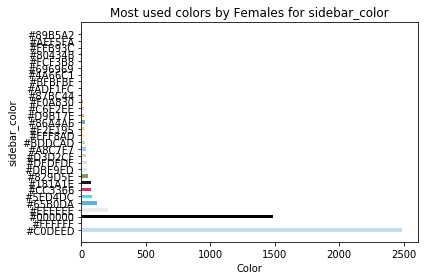

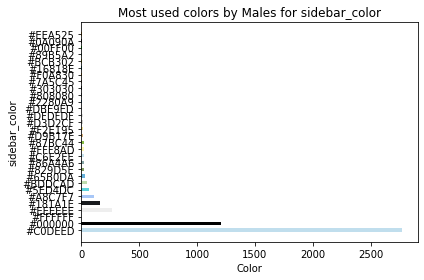

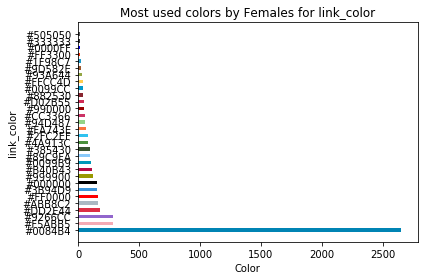

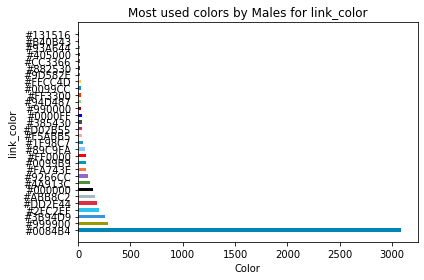

In [449]:
#Data exploration for color features

#Removing weird values from color
twitter = twitter.loc[(twitter['sidebar_color']).str.contains('E\+') != True]
twitter = twitter.loc[(twitter['link_color']).str.contains('E\+') != True]

#Plot for the most used 'sidebar_colors'
explore_color_feature(twitter, 'sidebar_color')

#Plot for the most used 'link_colors'
explore_color_feature(twitter, 'link_color')

As seen from plots displayed above, most users have not changed the default color of their profile, but if these are discarded, then there is sizeable dataset to be used for classification.

### Data exploration based on text

In [450]:
#Function to normalize text

def normalize_text_feature(txt):
    '''
    To normalize the text we convert them to strings, in lowercase and remove all punctuations.
    
    Arguments:
    txt: the text in the dataset that needs to be normalized.
    
    Returns:
    s: normalized string
    '''
    s = str(txt) 
    s = s.lower()
    txt = re.sub('\W\s',' ',s)
    s = re.sub('\s\W',' ',s)
    s = re.sub('@',' at_the_rate ',s)
    s = re.sub('\s+',' ',s)
    return s

In [451]:
#Function to find the different words and the number of occurences of each word

def compute_bag_of_words(txt):
    '''    
    Arguments:
    txt: The text in the dataset that needs to be vectorised.
    
    Returns:
    vectors: number of occurences of different words in txt 
    vocabulary: different words in txt
    '''
    vectorizer = CountVectorizer()
    vectors = vectorizer.fit_transform(txt)
    vocabulary = vectorizer.get_feature_names()
    return vectors, vocabulary

In [452]:
#Function to visualize the most used words in a dataset

def print_most_frequent(bow, vocab, gender):
    '''
    The 30 most used words are selected and displayed in a graph.
    
    Arguments:
    bow: bag of words - number of occurences of different words in the text
    vocab: different words in the text
    gender: the gender for which the graph is to be displayed
    
    Returns:
    None
    '''
    color_idx = ['female', 'male']
    label_table = ["Most used words by females for 'all_text'", "Most used words by males for 'all_text'"]
    
    #Selecting the 30 most used words to display
    n_most = 30
    idx = np.argsort(bow.sum(axis=0))
    idx_most_used = np.zeros(n_most)
    occurence_number = np.zeros(n_most)
    words_most_used = ["" for x in range(n_most)]

    for i in range(0,n_most):
        idx_most_used[i] = idx[0, -1-i]
        words_most_used[i] = vocab[np.int64(idx_most_used[i])]
        occurence_number[i] = bow.sum(axis=0)[0, idx[0, -1-i]]

    #Plotting the graph
    fig, ax = plt.subplots()
    
    word_number = np.arange(n_most)+1
    rects1 = plt.barh(word_number, occurence_number, label = label_table[color_idx.index(gender)])
    plt.yticks(word_number,words_most_used)
    plt.ylabel('Most used words')
    plt.xlabel('Number of occurences')
    plt.title(label_table[color_idx.index(gender)])
    plt.tight_layout()
    plt.show()

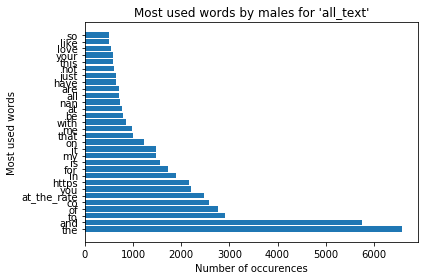

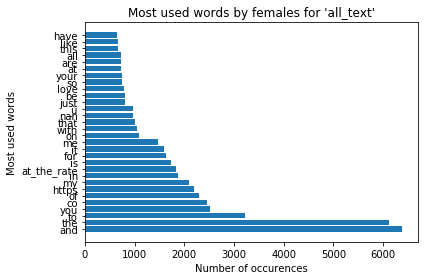

,gender,link_color,sidebar_color,all_text
0,male,08C2C2,FFFFFF,robbie e responds to critics after win against...
1,male,0084B4,C0DEED,ûïit felt like they were my friends and i was...
2,male,ABB8C2,C0DEED,i absolutely adore when louis starts the songs...
3,male,0084B4,C0DEED,hi jordanspieth looking at the url do you use ...
4,female,3B94D9,0,watching neighbours on sky+ catching up with t...


In [453]:
#Data exploration for text features
#Normalizing text and finding the most used words by each gender

#Adding a new column to the dataframe to store normalised version of 'text' and 'description'
twitter['text_norm'] = [normalize_text_feature(txt) for txt in twitter['text']]
twitter['description_norm'] = [normalize_text_feature(txt) for txt in twitter['description']]

#Concatenating the nomalized 'text_norm' and 'description_norm' into a single column as text can be represented in a single column
twitter['all_text'] =twitter['text_norm'].str.cat(twitter['description_norm'],sep=' ')
twitter = twitter.drop(['text', 'description', 'text_norm', 'description_norm'], axis = 1)

#Extract separate gender dataframes
female_data = twitter[twitter['gender']=='female']
male_data = twitter[twitter['gender']=='male']

#Computing and displaying bag of words and occurences of words for each gender
male_bow, male_voc = compute_bag_of_words(male_data['all_text'])
print_most_frequent(male_bow, male_voc, 'male')

female_bow, female_voc = compute_bag_of_words(female_data['all_text'])
print_most_frequent(female_bow, female_voc, 'female')

twitter.head()

### Training and testing of ML algorithms
The following classifiers have been chosen for training on the dataset:
1. SGD Classifier
2. Logistic Regression
3. SVM Classifier

The ML algorithms are trained on each feature of the dataset and the algorithm with the maximum accuracy is the most optimal model for this dataset and the feature that gives maximum accuracy is the optimal feature for classification of this data.

In [454]:
#Function to train and testing model

def train_and_predict(df, model, modelname, feature):
    '''
    Trains model and computes accuracy of the model.
    
    Arguments:
    df: dataset
    model: ML algorithm to be used
    model_name: name of ML algorithm
    feature: dataset column on which model is trained
    
    Returns:
    model: ML algorithm trained
    full_voc: vocabulary of dataset
    acc: accuracy of model
    '''
    print('Testing', modelname, " on", feature, ":" )
    
    #Tokenization of data
    full_bow, full_voc = compute_bag_of_words(df[feature])
    
    #Creating training and testing set
    X = full_bow
    y = LabelEncoder().fit_transform(df['gender'])
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)
    
    #Training and prediction
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    #Computing Mean-squared-error
    mse = metrics.mean_squared_error(y_test,y_pred)
    print('mse: {:.4f}'.format(mse))
    
    #Computing accuracy
    acc = round(model.score(X_test,y_test) * 100, 3)
    print('score: ', acc, ' %')
    
    return model, full_voc, acc

--------------------------------------------------------------------------------
Testing SGD Classifier  on all_text :
mse: 0.3569
score:  64.308  %
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Testing SGD Classifier  on link_color :
mse: 0.4028
score:  59.72  %
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Testing SGD Classifier  on sidebar_color :
mse: 0.4533
score:  54.666  %
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
Testing Logistic Regression  on all_text :


C:\Users\Adithya\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


mse: 0.3336
score:  66.641  %
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Testing Logistic Regression  on link_color :
mse: 0.4028
score:  59.72  %
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Testing Logistic Regression  on sidebar_color :
mse: 0.4530
score:  54.705  %
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
Testing SVM Classifier  on all_text :
mse: 0.3219
score:  67.807  %
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Testing SVM Classifier  on link_color :
mse: 0.4067
score:  59.331  %
-------------------------------

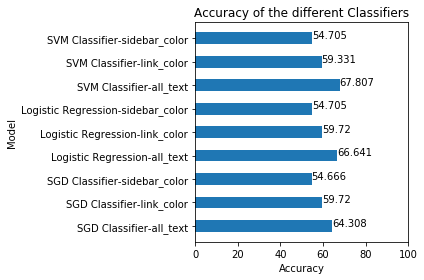

In [455]:
#Training the models and logging the accuracy

#List of the models
model_list = [linear_model.SGDClassifier(), linear_model.LogisticRegression(), svm.SVC()]
model_names = ['SGD Classifier', 'Logistic Regression', 'SVM Classifier']

#List of all features to be used in prediction
feature_name = ['all_text', 'link_color', 'sidebar_color']

#A list to store all model accuracies
accuracy_list = np.zeros(len(model_list) * len(model_names))

#Filtered dataframe
twitter_filter = twitter[['gender', 'link_color', 'sidebar_color', 'all_text']]

#Training and calculating accuracy
k = 0
for i in range(0, len(modelListColor)):
    
    print('=' * 80)
    
    for j in range(0, len(feature_name)):
        
        print('-' * 80)
        
        model_name = model_names[i]
        model_list[i], voc_color, accuracy_list[k] = train_and_predict(twitter_filter, model_list[i], model_name, feature_name[j])
        k += 1
        
        print('-' * 80)
    
    print('=' * 80)
    print()

#Creating a list to store model names with prediction feature
model_names_plot = [' ' for x in range(len(model_list) * len(model_names))]
k = 0

for i in range(0, len(modelListColor)):
    
    for j in range(0, len(feature_name)):
        
        model_names_plot[k] = model_names[i] + '-' + feature_name[j]
        k += 1

#Plotting the accuracy
fig, ax1 = plt.subplots()
ax1.set_xlim([0, 100])
bar_width = 0.5
model_number = np.arange(len(accuracy_list))
rects1 = plt.barh(model_number, accuracy_list, bar_width, label = 'Brand Predictors')
plt.yticks(model_number, model_names_plot)
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Accuracy of the different Classifiers')
plt.tight_layout()
for index, value in enumerate(accuracy_list):
    plt.text(value, index, str(value))
plt.show()

### Conclusion
As seen from the results above, the SVM Classifier gives the maximum accuracy when trained on the text of users in twitter. Hence, The SVM Classifier trained on text is the most optimal model among the considered algorithms and the text of users is the optimal feature for classifying gender in the given dataset.